In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [3]:
db= mysql.connector.connect(
    host='localhost',
    username='root',
    password='dhaval511',
    database='ecommerce')

cur = db.cursor()

### List all unique cities where customers are located

In [3]:
query ="""SELECT DISTINCT customer_city FROM customers """

cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

### Count the number of orders placed in 2017

In [9]:
query ="""SELECT COUNT(order_id)
        FROM orders
        WHERE year(order_purchase_timestamp) = 2017  """

cur.execute(query)
data = cur.fetchall()
print(f"Total orders placed in 2017 are {data[0][0]}")

Total orders placed in 2017 are 45101


### Find the total sales per category

In [15]:
query ="""SELECT UPPER(p.product_category),ROUND(SUM(py.payment_value),2)
            FROM products p JOIN order_items o
            ON p.product_id = o.product_id
            JOIN payments py
            ON py.order_id = o.order_id
            GROUP BY p.product_category """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=['Category','Sales'])
df.head(5)

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,FASHION BAGS AND ACCESSORIES,218158.28
4,BED TABLE BATH,1712553.67


### Calculate the percentage of orders that were paid in installments

In [ ]:
query ="""SELECT (SUM(CASE WHEN payment_installments > 1 then 1 else 0 END))/COUNT(*) * 100
            FROM payments """

cur.execute(query)
data = cur.fetchall()
data[0][0]

Decimal('49.4176')

### Count number of customers from each state

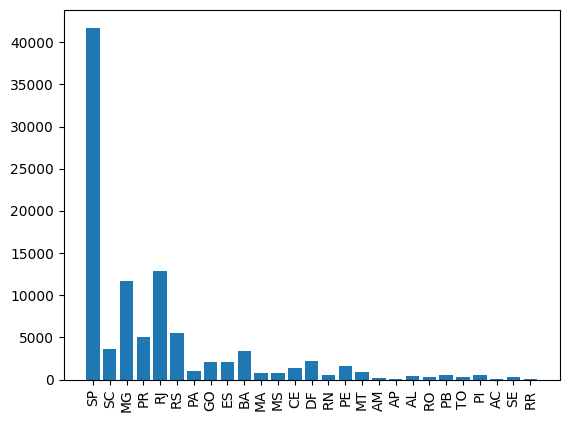

In [21]:
query ="""SELECT customer_state,COUNT(*) 
            FROM customers
            GROUP BY customer_state """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=['state','customer_count'])

plt.bar(df['state'],df['customer_count'])
plt.xticks(rotation = 90)
plt.show()

### Calculate the number of orders per month in 2018

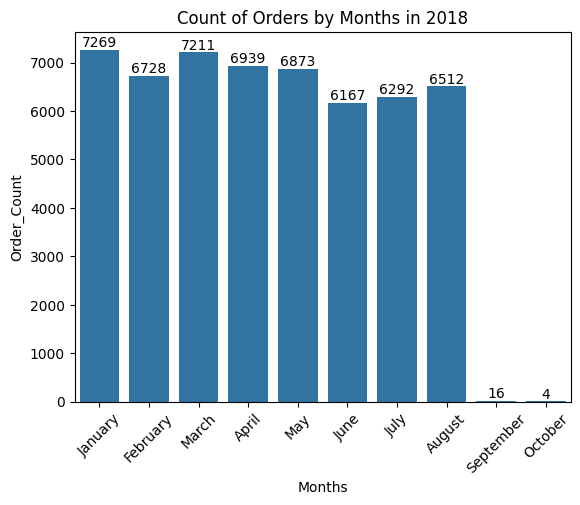

In [36]:
query ="""SELECT MONTHNAME(order_purchase_timestamp) AS month, COUNT(order_id) AS order_count
            FROM orders
            WHERE YEAR(order_purchase_timestamp) = 2018
            GROUP BY month """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=['Months','Order_Count'])
o= ['January','February','March','April','May','June','July','August','September','October']
ax = sns.barplot(x=df['Months'],y=df['Order_Count'],data =df,order= o)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months in 2018")
plt.show()

### Find the average number of Products per order, grouped by customer city.

In [ ]:
query ="""with count_per_order as (
SELECT o.order_id,o.customer_id,Count(oi.order_id) as oc
FROM orders o JOIN order_items oi
ON o.order_id = oi.order_id
GROUP BY o.order_id,o.customer_id)

select c.customer_city,ROUND(AVG(count_per_order.oc),2) average_orders
FROM customers c JOIN count_per_order
ON c.customer_id = count_per_order.customer_id
GROUP BY c.customer_city
ORDER BY average_orders DESC """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=['City','Average_products_per_orders'])
df.head(10)


,City,Average_orders
0,padre carvalho,7.00
1,celso ramos,6.50
2,candido godoi,6.00
3,datas,6.00
4,matias olimpio,5.00
5,morro de sao paulo,4.00
6,cidelandia,4.00
7,picarra,4.00
8,teixeira soares,4.00
9,curralinho,4.00


### Calculate the percentage of total revenue contributed by each product categry

In [8]:
query ="""SELECT UPPER(p.product_category),ROUND((SUM(py.payment_value)/(SELECT SUM(payment_value) FROM payments))*100,2) AS sales
            FROM products p JOIN order_items o
            ON p.product_id = o.product_id
            JOIN payments py
            ON py.order_id = o.order_id
            GROUP BY p.product_category
            ORDER BY sales DESC"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=['Product_category','Percent_sales'])
df.head(5)

,Product_category,Percent_sales
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93


### Identify the correlation between product price and the number of times a product has been purchased.

In [15]:
query = """with product_purchased AS (SELECT product_id,COUNT(order_id) as order_count
FROM order_items
GROUP BY product_id),
product_price AS (
    SELECT 
        product_id,
        AVG(price) AS avg_price
    FROM order_items
    GROUP BY product_id
)

SELECT pp.product_id,pp.order_count,ppr.avg_price
FROM product_purchased pp JOIN product_price ppr
ON pp.product_id = ppr.product_id"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=['Product_id','No_times_purchased','Price'])
df.head(5)

,Product_id,No_times_purchased,Price
0,4244733e06e7ecb4970a6e2683c13e61,9,59.233335
1,e5f2d52b802189ee658865ca93d83a8f,1,239.899994
2,c777355d18b72b67abbeef9df44fd0fd,3,199.000000
3,7634da152a4610f1595efa32f14722fc,2,12.990000
4,ac6c3623068f30de03045865e4e10089,12,202.399994


In [19]:
import numpy as np
arr1= df['No_times_purchased']
arr2= df['Price']
a= np.corrcoef([arr1,arr2])
print("the correlation between price and number of times product piurchased is",a[0][1])

KeyError: 'No_times_purchased'

### Identify the correlation between product price and the number of times a product has been purchased on category level

In [17]:
query = """SELECT products.product_category,
COUNT(order_items.product_id),
ROUND(AVG(order_items.price),2)
FROM products JOIN order_items
ON products.product_id = order_items.product_id
GROUP BY products.product_category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=['Product_category','order_count','Price'])
df.head(5)

,Product_category,order_count,Price
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14


In [21]:
import numpy as np
arr1= df['order_count']
arr2= df['Price']
a= np.corrcoef([arr1,arr2])
print("the correlation between price and number of times product piurchased is",a[0][1])

the correlation between price and number of times product piurchased is -0.10631514167157562


### Calculate the total revenue genrated by each seller and rank them by revenue.

In [24]:
query ="""SELECT *,DENSE_RANK() OVER( ORDER BY revenue DESC) as seller_rank
            FROM ( SELECT oi.seller_id,SUM(p.payment_value) revenue
                    FROM order_items oi JOIN payments p
                    ON oi.order_id = p.order_id
                    GROUP BY oi.seller_id) AS a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=['sellers','revenue','rank'])
df.head(5)

,sellers,revenue,rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.907302,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.039840,2
2,4a3ca9315b744ce9f8e9374361493884,301245.269765,3
3,1f50f920176fa81dab994f9023523100,290253.420128,4
4,53243585a1d6dc2643021fd1853d8905,284903.080498,5


### Calculate the moving average of order values for each customer on their order history

In [28]:
query="""SELECT 
    customer_id,
    order_purchase_timestamp,payment,
    AVG(payment) OVER (
        PARTITION BY customer_id 
        ORDER BY order_purchase_timestamp
        ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
    ) AS mov_avg
FROM (
    SELECT 
        o.customer_id,
        o.order_purchase_timestamp,
        p.payment_value AS payment
    FROM orders o 
    JOIN payments p ON o.order_id = p.order_id
) AS a"""

cur.execute(query)
data = cur.fetchall()
df= pd.DataFrame(data,columns=['Customer','Purchase_time','Price','Moving_avg'])
df.head(5)

,Customer,Purchase_time,Price,Moving_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002


### Calculate the cumulative sales per month for each year

In [30]:
query="""SELECT years,months,revenue,SUM(revenue) OVER (ORDER BY years,months)  as cumulative_sales FROM
(SELECT year(orders.order_purchase_timestamp) AS years,
		month(orders.order_purchase_timestamp) AS months,
        ROUND(SUM(payments.payment_value),2) as revenue
        FROM  orders JOIN payments
        ON orders.order_id = payments.order_id
        GROUP BY years,months
        ORDER BY years,months) as A
"""
cur.execute(query)
data = cur.fetchall()
df= pd.DataFrame(data,columns=['Year','Month','Price','Cumulative_Revnue'])
df.head(5)

,Year,Month,Price,Cumulative_Revnue
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39


### Calculate the year over year growth rate of total sales

In [31]:
query = """
WITH A as (SELECT year(orders.order_purchase_timestamp) AS years,ROUND(SUM(payments.payment_value),2) as revenue
        FROM  orders JOIN payments
        ON orders.order_id = payments.order_id
        GROUP BY years
        ORDER BY years)
SELECT years,revenue,ROUND(((revenue-LAG(revenue,1) OVER(ORDER BY years))/LAG(revenue,1) OVER(ORDER BY years)) *100,2) FROM A"""

cur.execute(query)
data = cur.fetchall()
df= pd.DataFrame(data,columns=['Year','Revenue','YoY_%growth'])
df.head(5)

,Year,Revenue,YoY_%growth
0,2016,59362.34,NaN
1,2017,7249746.73,12112.7
2,2018,8699763.05,20.0


### Calculate the rentention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase

In [32]:
query="""
WITH first_order_date AS (
    SELECT 
        c.customer_id, 
        MIN(o.order_purchase_timestamp) AS first_order
    FROM customers c
    JOIN orders o
    ON c.customer_id = o.customer_id
    GROUP BY c.customer_id
),
retained_customers AS (
    SELECT 
        fod.customer_id
    FROM first_order_date fod
    JOIN orders o
    ON fod.customer_id = o.customer_id
    WHERE o.order_purchase_timestamp > fod.first_order 
      AND o.order_purchase_timestamp < DATE_ADD(fod.first_order, INTERVAL 6 MONTH)
    GROUP BY fod.customer_id
)
SELECT 
    (COUNT(DISTINCT rc.customer_id) * 100.0 / COUNT(DISTINCT fod.customer_id)) AS retention_rate
FROM first_order_date fod
LEFT JOIN retained_customers rc
ON fod.customer_id = rc.customer_id;
"""

cur.execute(query)
data = cur.fetchall()
data

[(Decimal('0.00000'),)]

### Identify the top 3 customers who spent the most money in each year

In [ ]:
query="""
WITH ranked_customers AS (
    SELECT 
        o.customer_id,
        YEAR(o.order_purchase_timestamp) AS year,
        SUM(p.payment_value) AS total_spent,
        DENSE_RANK() OVER (
            PARTITION BY YEAR(o.order_purchase_timestamp) 
            ORDER BY SUM(p.payment_value) DESC
        ) AS cust_rank
    FROM orders o 
    JOIN payments p
    ON o.order_id = p.order_id
    GROUP BY YEAR(o.order_purchase_timestamp), o.customer_id
)
SELECT 
    customer_id, 
    year, 
    ROUND(total_spent,2), 
    cust_rank
FROM ranked_customers
WHERE cust_rank <= 3
ORDER BY year, cust_rank;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ['customers','year','Total_spent','Rank'])

,customers,year,Total_spent,Rank
0,a9dc96b027d1252bbac0a9b72d837fc6,2016,1423.55,1
1,1d34ed25963d5aae4cf3d7f3a4cda173,2016,1400.74,2
2,4a06381959b6670756de02e07b83815f,2016,1227.78,3
3,1617b1357756262bfa56ab541c47bc16,2017,13664.08,1
4,c6e2731c5b391845f6800c97401a43a9,2017,6929.31,2
5,3fd6777bbce08a352fddd04e4a7cc8f6,2017,6726.66,3
6,ec5b2ba62e574342386871631fafd3fc,2018,7274.88,1
7,f48d464a0baaea338cb25f816991ab1f,2018,6922.21,2
8,e0a2412720e9ea4f26c1ac985f6a7358,2018,4809.44,3


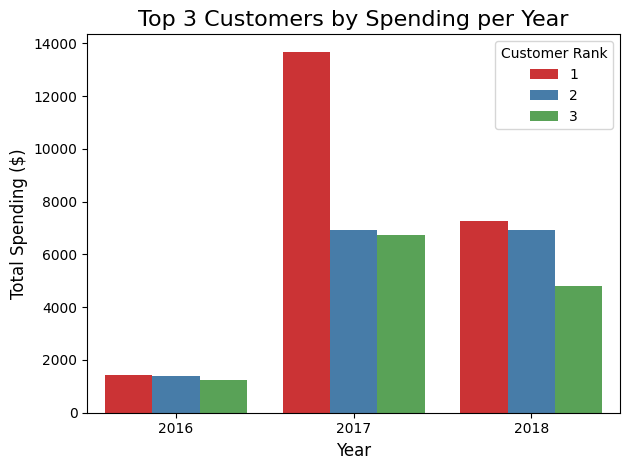

In [45]:
sns.barplot(
    data=df,
    x="year",
    y="Total_spent",
    hue="Rank",
    palette="Set1"
)


plt.title("Top 3 Customers by Spending per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Spending ($)", fontsize=12)
plt.legend(title="Customer Rank", loc="upper right", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()


plt.show()